# Plot median variables in fuction dPM
Based on plot_f_infos BUT not on Traj but pd dataframes

In [1]:
#Data informations
path= '/mnt/c/Users/Valentine/Documents/Analysis/POI_replicats/'
files = ['Prm1','Dni1','Dni2','Fus1','Exo70','Exo84', 'Myo51', 'Cdc8']
folder='/aligned_trajectories/Data/average/'
colPOI=colPOI=['lime', 'darkturquoise','hotpink','forestgreen', 'purple','darkslateblue','darkorange','goldenrod']
Myo= ['Myo52_M', 'Myo52_P']
colMyo=['blue', 'red']
n= len(files)

#import python packages
from trajalign.traj import Traj
from trajalign.average import load_directory
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

os.makedirs(path+'/Graphs/', exist_ok=True)
    
def replicats_nb(POI):
    rep_list = [ folder for folder in os.listdir(path+POI+'/aligned_trajectories/') if 'Rep_' in folder ]
    r= len(rep_list)
    return r

Rep= []
for i in range(n):
    r=replicats_nb(files[i])
    Rep.append(r)

In [2]:
#load data per Replicats
x_f_POI=[[] for _ in range(n)]
med_f_POI=[[] for _ in range(n)]
sd_f_POI=[[] for _ in range(n)]
x_f_P=[[] for _ in range(n)]
med_f_P=[[] for _ in range(n)]
sd_f_P=[[] for _ in range(n)]
x_f_M=[[] for _ in range(n)]
med_f_M=[[] for _ in range(n)]
sd_f_M=[[] for _ in range(n)]

x_dist=[[] for _ in range(n)]
med_dist=[[] for _ in range(n)]
sd_dist=[[] for _ in range(n)]

for i in range (n):
    for r in range(Rep[i]):
        filename_fpoi= path+files[i]+folder+'Average_d_f_POI_Rep_'+str(r+1)+'.csv' #add f_poi replicates file to sublist
        f_POI=pd.read_csv(filename_fpoi)
        x_f_POI[i].append(f_POI['x_plt'].tolist())
        med_f_POI[i].append(f_POI['Median Var'].tolist())
        sd_f_POI[i].append(f_POI['Standard Deviation'].tolist())
        
        filename_fp= path+files[i]+folder+'Average_d_f_P_Rep_'+str(r+1)+'.csv'
        f_P=pd.read_csv(filename_fp)
        x_f_P[i].append(f_P['x_plt'].tolist())
        med_f_P[i].append(f_P['Median Var'].tolist())
        sd_f_P[i].append(f_P['Standard Deviation'].tolist())
        
        filename_fm= path+files[i]+folder+'Average_d_f_M_Rep_'+str(r+1)+'.csv'
        f_M=pd.read_csv(filename_fm)
        x_f_M[i].append(f_M['x_plt'].tolist())
        med_f_M[i].append(f_M['Median Var'].tolist())
        sd_f_M[i].append(f_M['Standard Deviation'].tolist())
        
        filename_dist=path+files[i]+folder+'Average_d_distPPOI_Rep_'+str(r+1)+'.csv'
        D=pd.read_csv(filename_dist)
        x_dist[i].append(D['x_plt'].tolist())
        med_dist[i].append(D['Median Var'].tolist())
        sd_dist[i].append(D['Standard Deviation'].tolist())



In [14]:
def plot_f_info (x,y,sd, color, names, sample='Rep', what='f'):
    
    if sample=='tot':
        list=[item for sublist in list for item in sublist]
    
    a=0.1
    for i in range(len(x)):
        x_plt=np.array(x[i])
        y_plt=np.array(y[i])
        sd_u=y_plt+np.array(sd[i])
        sd_l=y_plt-np.array(sd[i])
        if sample=='tot':
            col=color[i]
            label=names[i]
        elif sample == 'Rep':
            label='Rep_'+str(i+1)
            col=color
            
        plt.plot(x_plt,y_plt,color=col, alpha =(a+0.4), label=label, linewidth=4)
        plt.scatter(x_plt,y_plt,color=col, alpha =(a+0.4), label=label, linewidth=4)
        if sample == 'Rep':
            plt.fill_between(x_plt,sd_u,sd_l,color=col, alpha =a )
            a+=0.1
        elif sample=='tot':
            plt.plot(x_plt,sd_u,color=col,alpha=0.4,linestyle=':')
            plt.plot(x_pltsd_l,color=col,alpha=0.4,linestyle=':')
            
        plt.xlim(-800,-70)
        plt.xlabel ('Myo52 distance (nm)',fontsize=24)
        if sample=='Rep':
            plt.title(names,fontsize=28) 
        handles, labels = plt.gca().get_legend_handles_labels()
        labels, ids = np.unique(labels, return_index=True) 
        handles = [handles[i] for i in ids] 
        plt.legend(handles, labels, loc='best',fontsize=24) 
        plt.grid(visible=True)
        
        if what=='f':
            plt.ylim(-0.1,1.1)
            plt.ylabel ('median average fluorescent int. (AU)',fontsize=24)
        
        elif what=='dist':
            plt.ylim(-300,150)
            plt.ylabel ('median distance from Myo_P (nm)',fontsize=24)
            plt.hlines(0,-800,-75, color='red',linewidth=4)
  

## plot distance

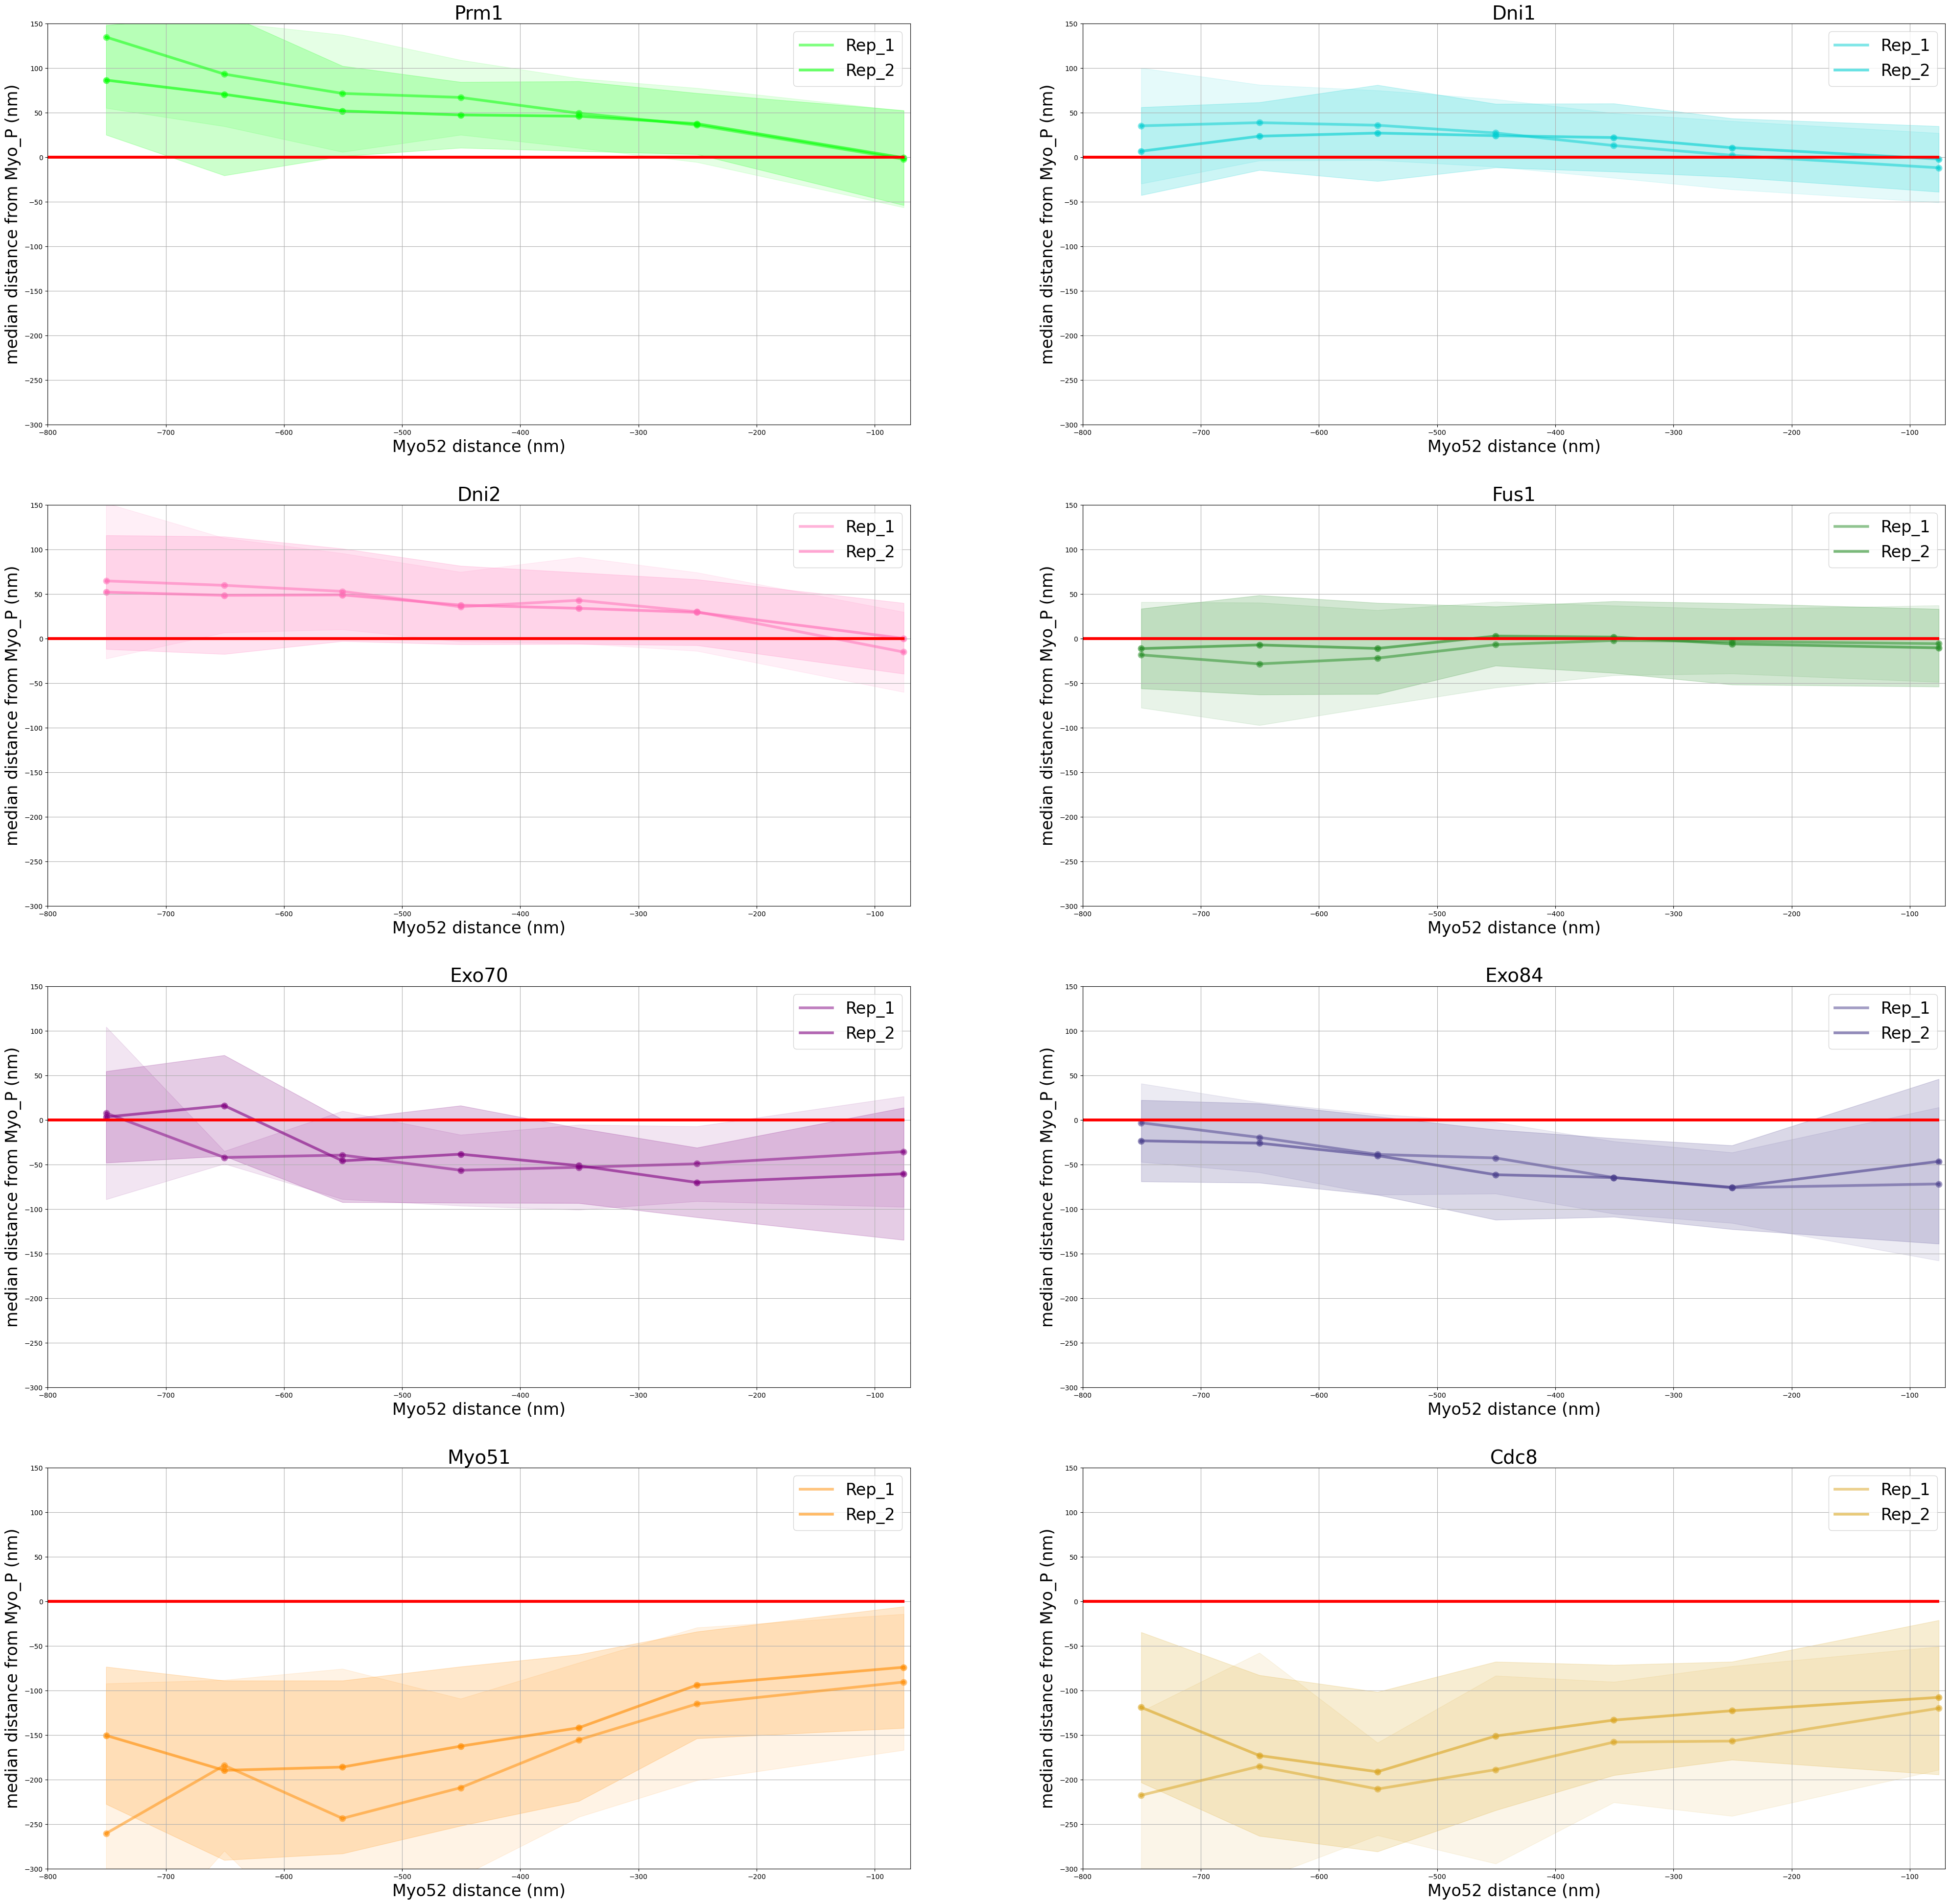

In [17]:
plt.figure(figsize=((25*2,25*np.ceil(n/2))))
for i in range(len(files)):
    plt.subplot(n,2,i+1)
    plot_f_info(x_dist[i],med_dist[i],sd_dist[i],colPOI[i],files[i],sample='Rep',what='dist')
figname=path+'/Graphs/Rep_d_dist.pdf'
plt.savefig(figname)
plt.show(figname)
plt.close()

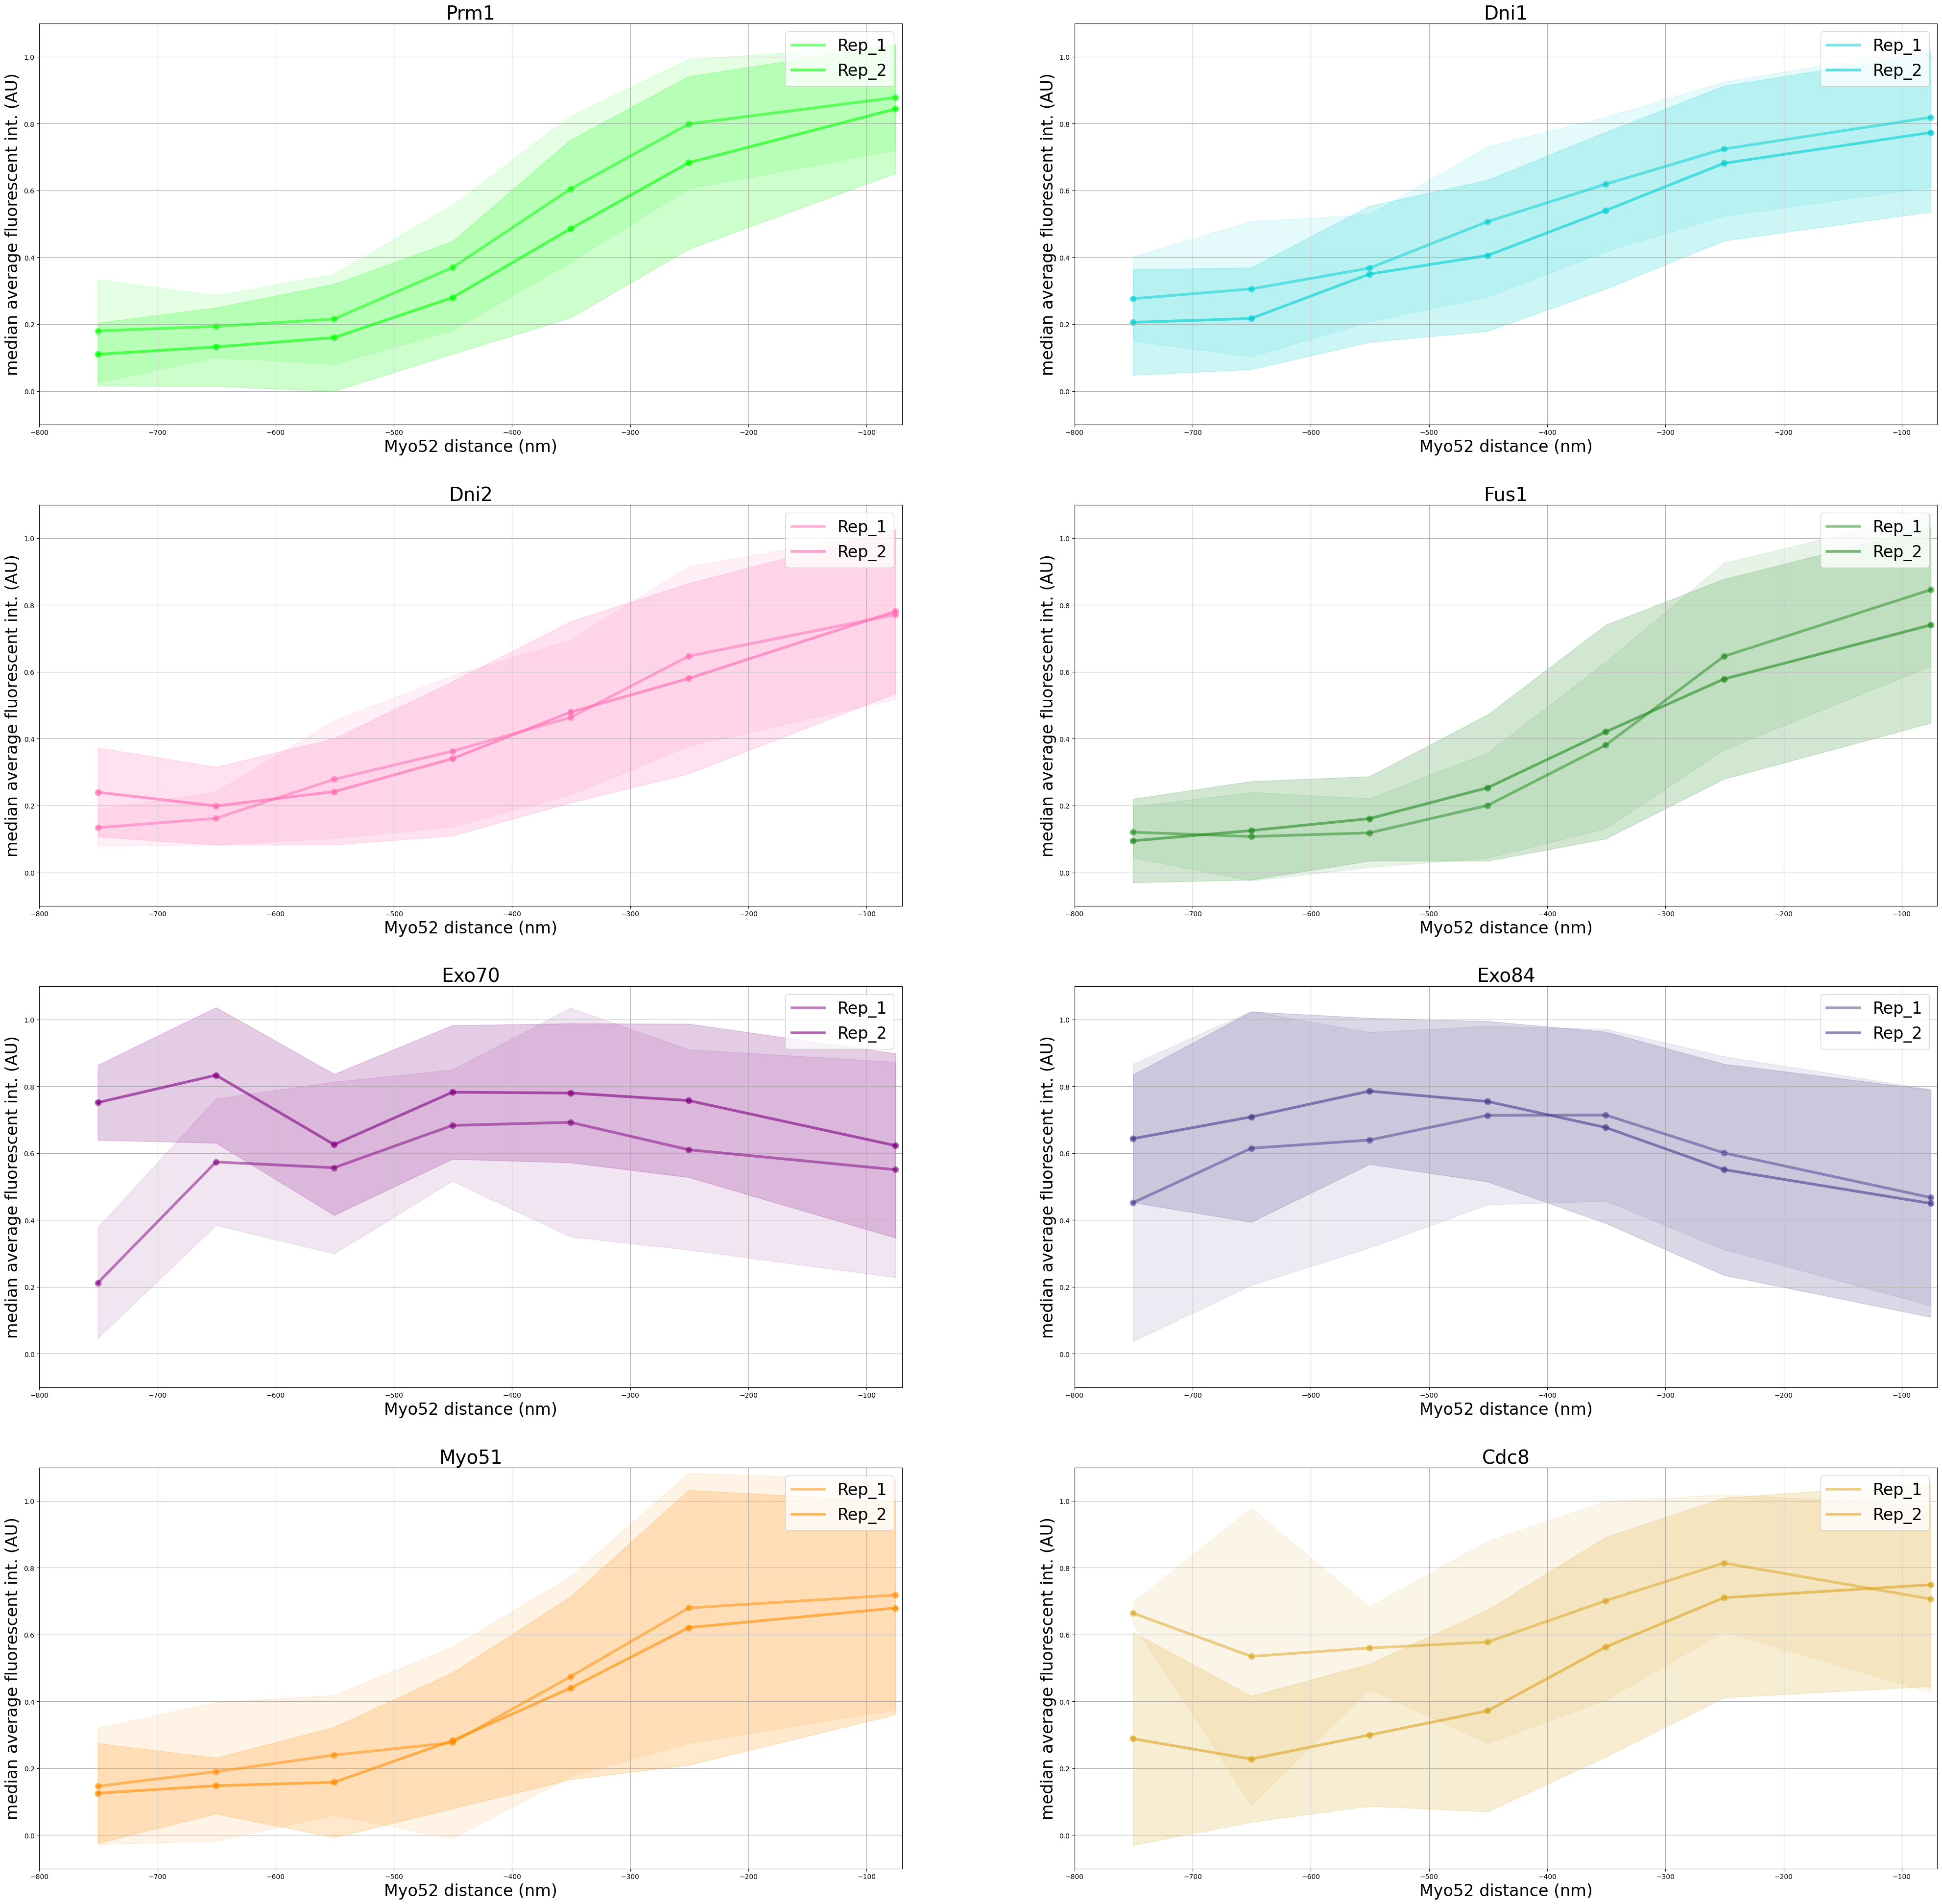

In [18]:
plt.figure(figsize=((25*2,25*np.ceil(n/2))))
for i in range(len(files)):
    plt.subplot(n,2,i+1)
    plot_f_info(x_f_POI[i],med_f_POI[i],sd_f_POI[i],colPOI[i],files[i],sample='Rep',what='f')
figname=path+'/Graphs/Rep_d_fluo_POI.pdf'
plt.savefig(figname)
plt.show(figname)
plt.close()

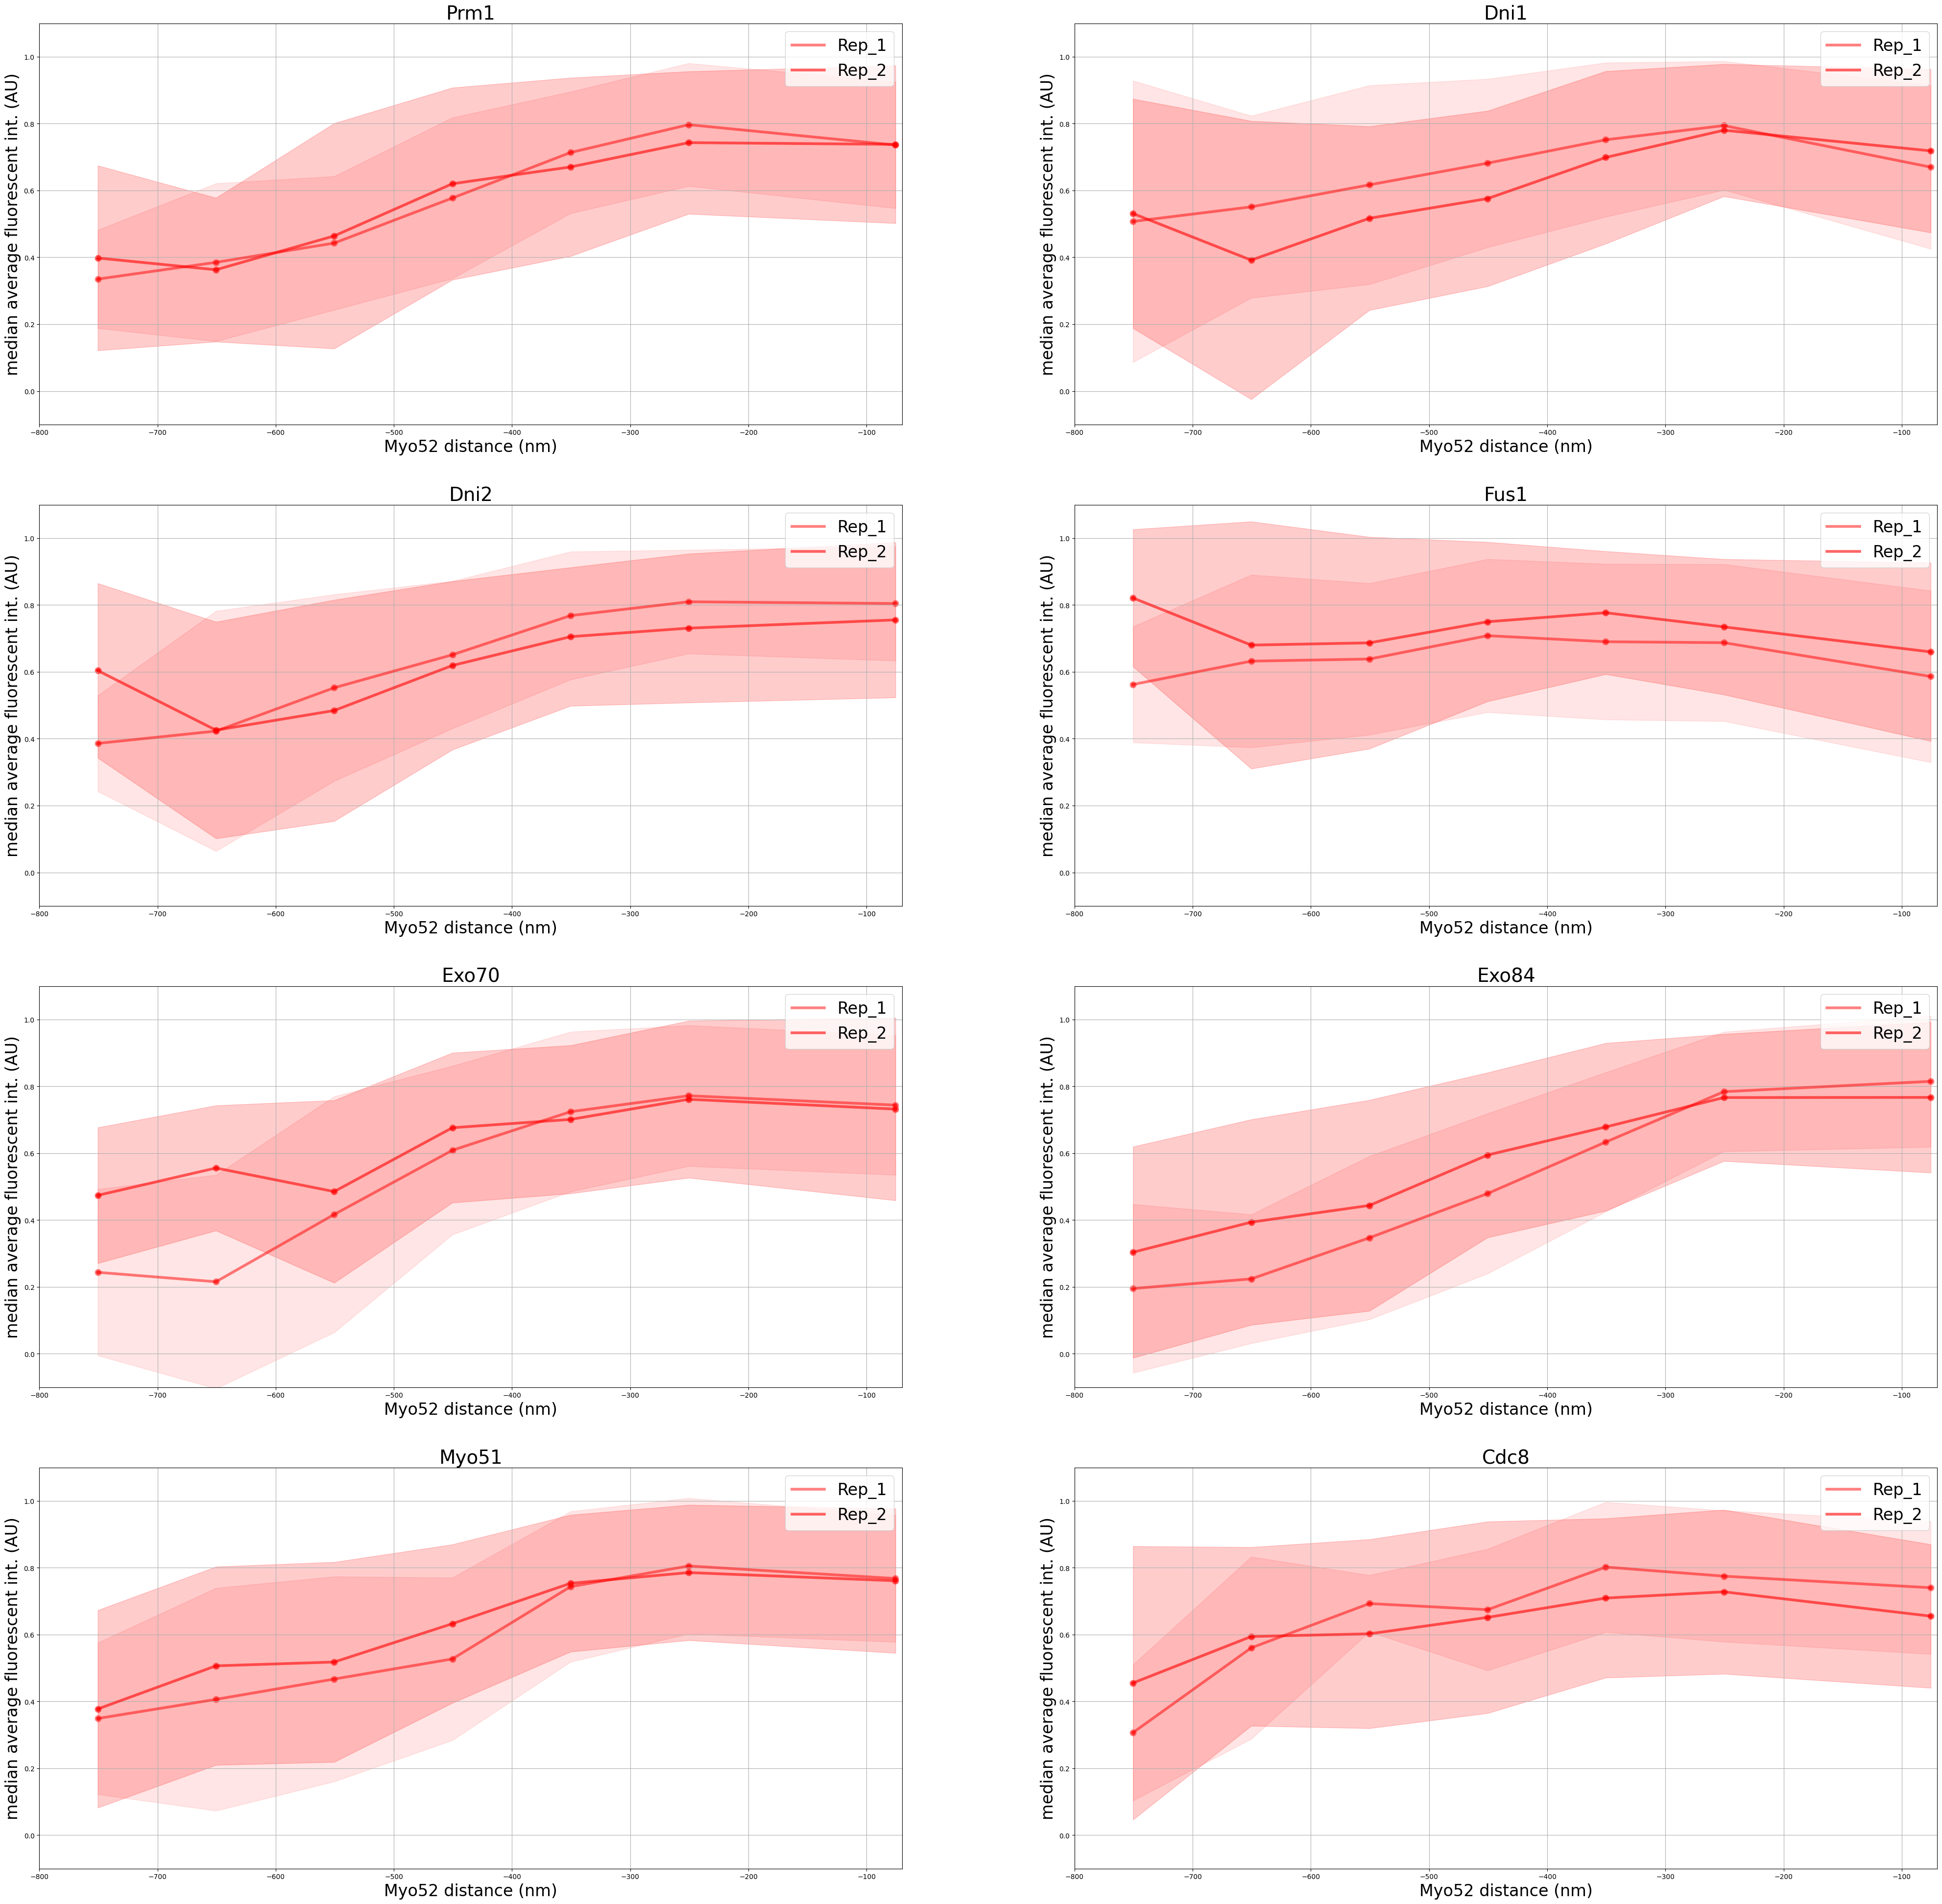

In [19]:
plt.figure(figsize=((25*2,25*np.ceil(n/2))))
for i in range(len(files)):
    plt.subplot(n,2,i+1)
    plot_f_info(x_f_P[i],med_f_P[i],sd_f_P[i],'red',files[i],sample='Rep',what='f')
figname=path+'/Graphs/Rep_d_fluo_P.pdf'
plt.savefig(figname)
plt.show(figname)
plt.close()

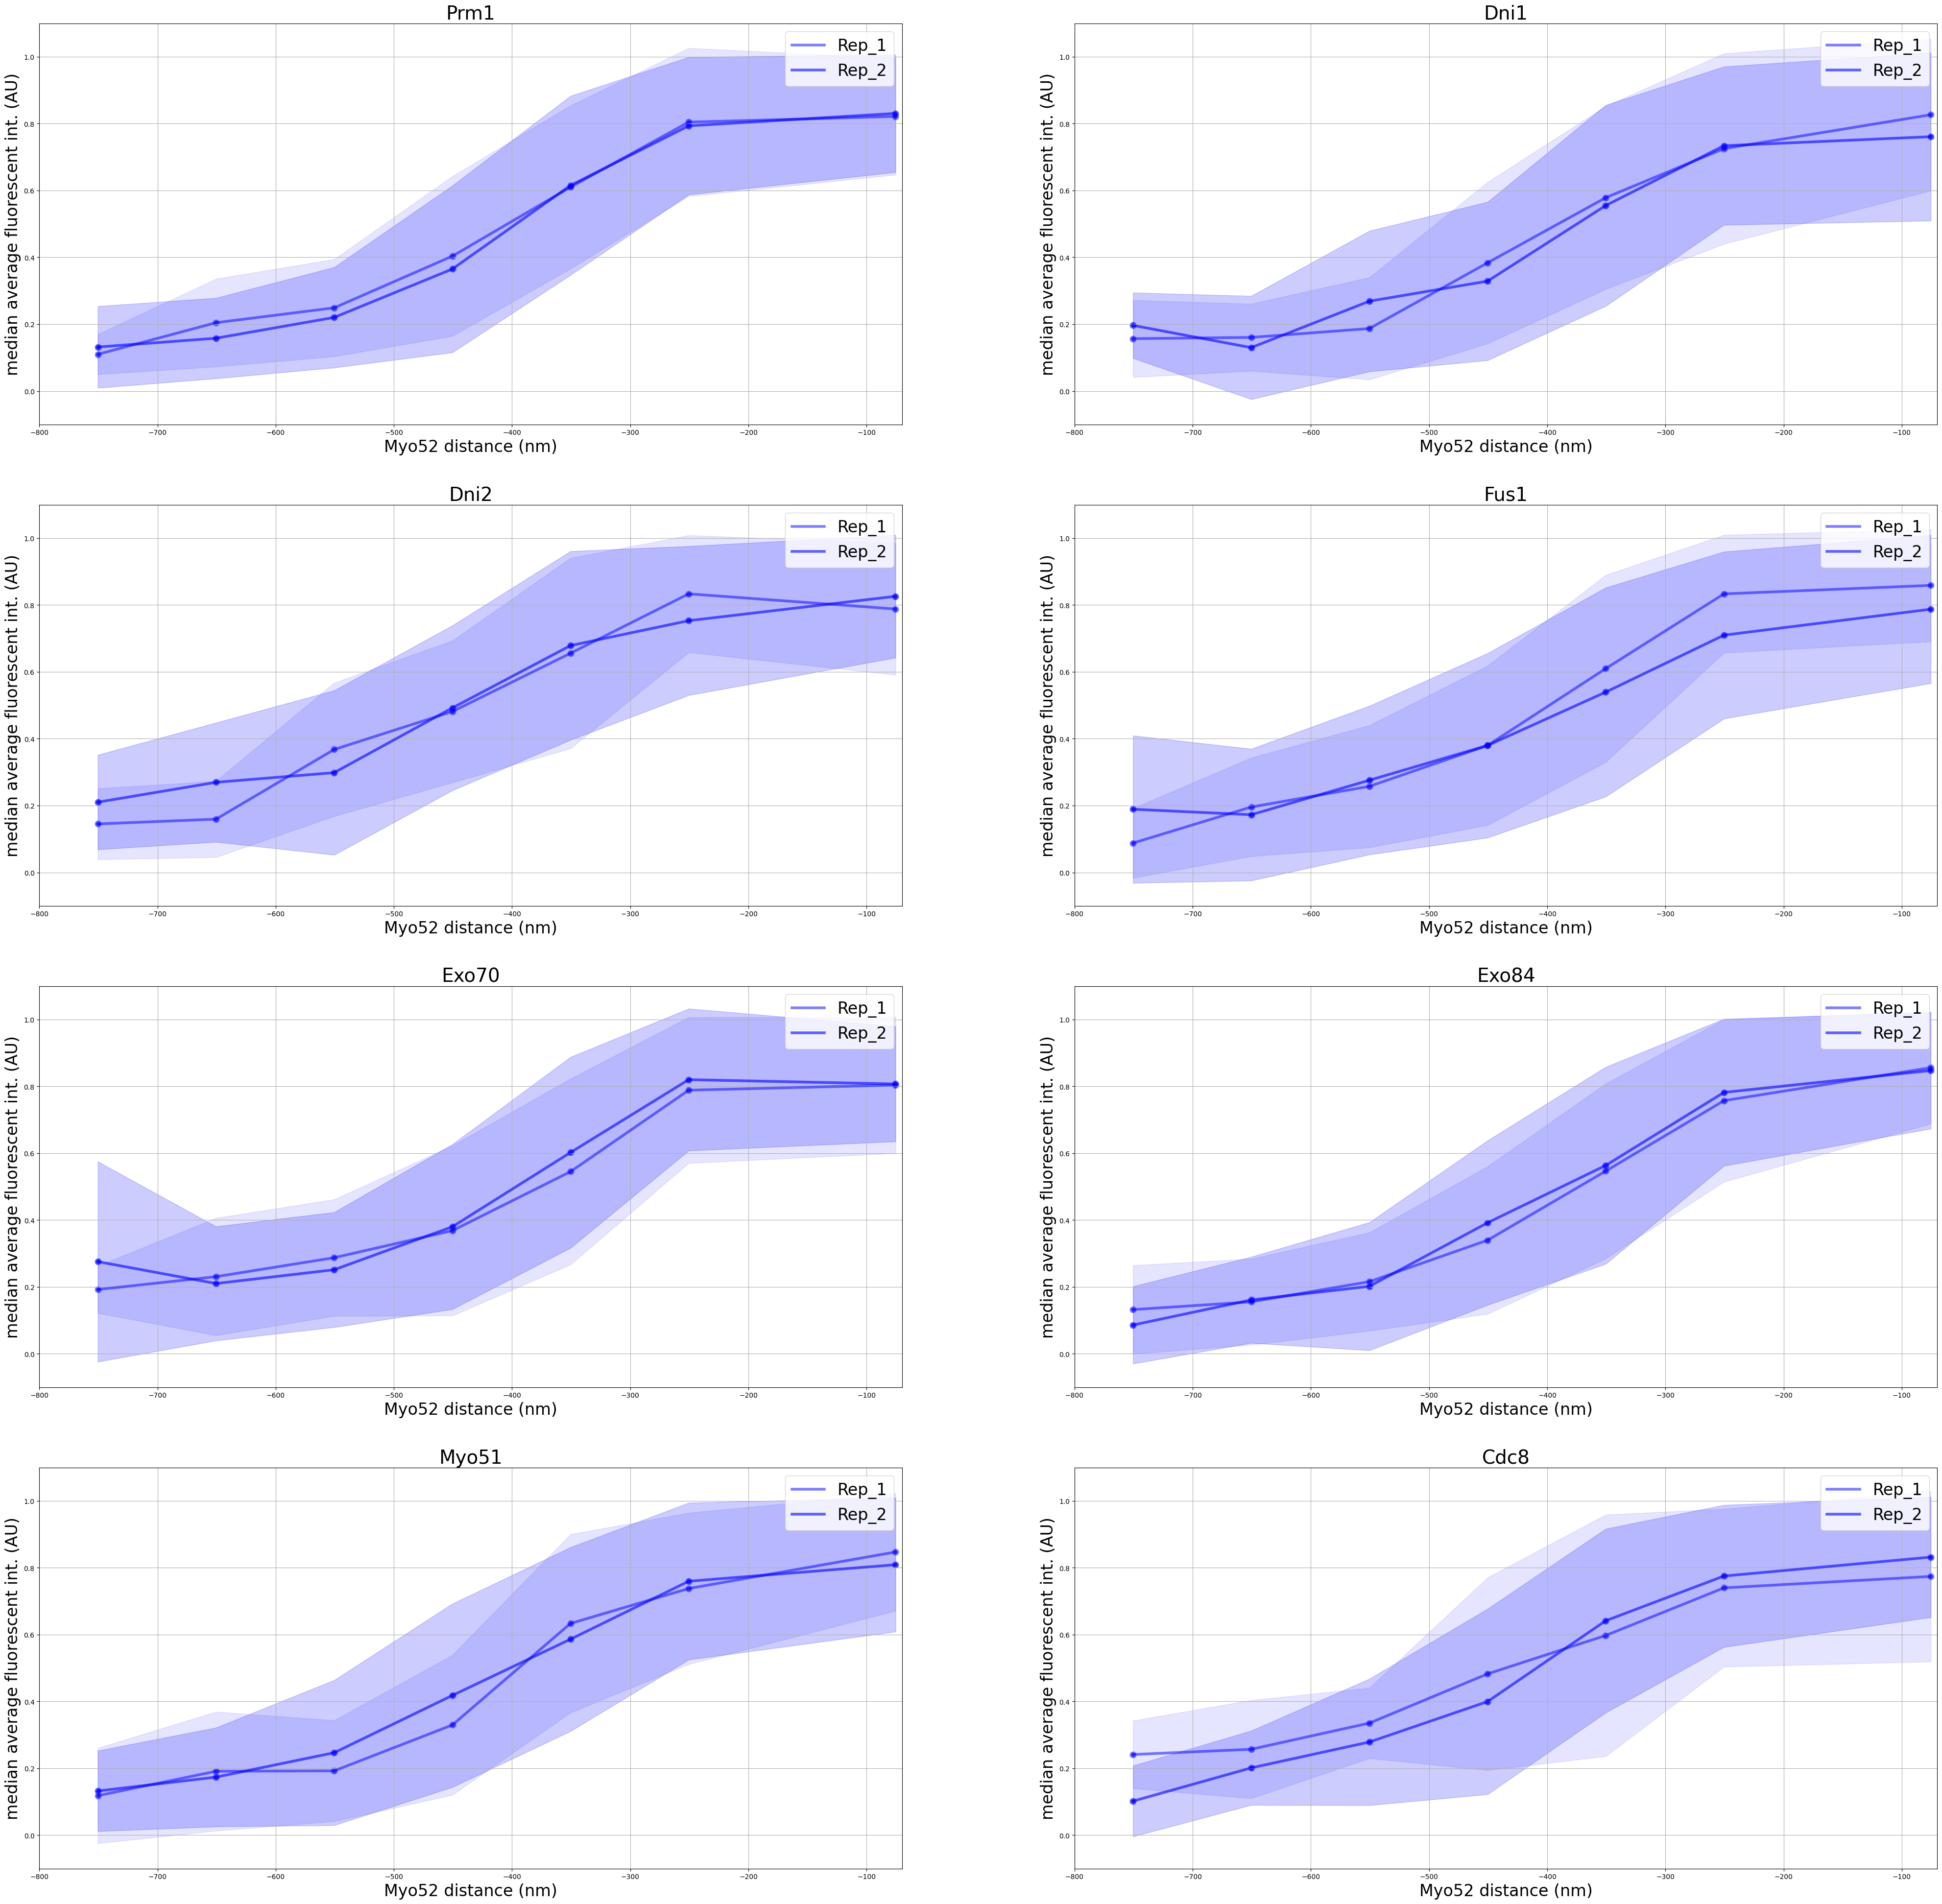

In [20]:
plt.figure(figsize=((25*2,25*np.ceil(n/2))))
for i in range(len(files)):
    plt.subplot(n,2,i+1)
    plot_f_info(x_f_M[i],med_f_M[i],sd_f_M[i],'blue',files[i],sample='Rep',what='f')
figname=path+'/Graphs/Rep_d_fluo_M.pdf'
plt.savefig(figname)
plt.show(figname)
plt.close()